# Otimização e Machine Leaning - Exercício 1

Exercício adaptado de: Curso Machine Learning by Andrew Ng, Coursera: https://www.coursera.org/learn/machine-learning/.


## 1 - Criando uma matriz identidade 5x5

Para se familiarizar com o ambiente de desenvolvimento, crie uma matriz identidade 5x5 (tipo float)


In [1]:
using LinearAlgebra
Matrix{Float64}(I, 5, 5)

5×5 Matrix{Float64}:
 1.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  1.0

# Regressão Linear

Provavalmente o modelo de predição de dados mais simples é a regressão linear. Este exercício irá abordar um conjunto de dados com uma variável. Você irá utilizar o método do gradiente para encontrar uma solução.



## 2 - Leitura dos dados de `ex1data1.txt`

Verifique se você está de fato realizando a leitura correta de todos os dados.

In [2]:
using DelimitedFiles
data = readdlm("ex1data1.txt", ',');
x = data[:, 1];
y = data[:, 2];


## 3 - Plotando os dados

Importar `Plots` pela primeira vez irá tomar um tempo (alguns segundos até um minuto). Analise porque isto acontece (tem a ver com a linguagem `Julia`).


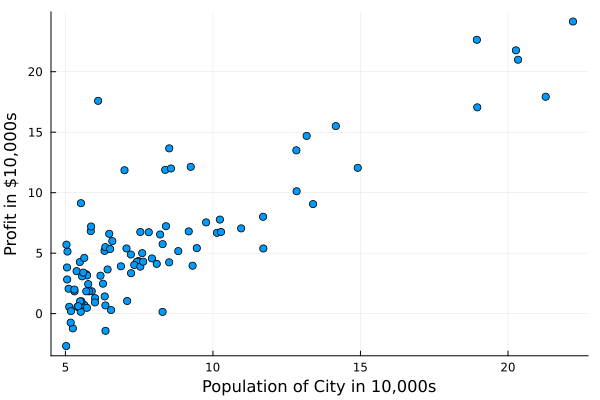

In [3]:
using Plots
xlabel = "Population of City in 10,000s"
ylabel = "Profit in \$10,000s"
scatter(x, y, xlabel=xlabel, ylabel=ylabel, legend=false)


## 4 - Defina a função custo

A função custo (ou penalidade) neste exercício é a soma dos erros quadráticos dividido pelo número de amostras.

$$ J(\theta) = \frac{1}{2m}\sum_{i=1}^m \left( h_\theta (x^{(i)}) - y^{(i)} \right)^2$$

em que a hipótese $h_\theta$ é dada pelo modelo linear

$$ h_\theta (x) = \theta^T x = \theta_0 + \theta_1 x_1 $$

e $x$ é um vetor de duas coordenadas, sendo $x = [1, x_1]^T$

Cire uma função denominada compute_cost que recebe como parâmetros 

* X: matriz tipo m linhas por n colunas.. cada linha é do tipo $[1, x^m]$, sendo m uma amostra... 

* y: vetor do tipo m x 1

* theta: chute inicial dos parâmetros de regressão (variáveis de decisão do problema)

e retorna o custo total

In [4]:
"""
    compute_cost(x, y, theta)

Compute the cost, sum of the squares of the errors.

# Arguments
- `x::Array{Number,2}` : the independent variable matrix. The rows are examples, the columns features.
- `y::Array{Number,1}` : the dependent vector.
- `theta::Array{Number,1}` : the parameter vector (``\\theta_0 + \\theta_1 x_i``)

# Return
`::Number` : Cost value
"""
function compute_cost(X, y, theta)
    # Número de amostras
    m = length(y)  
    
    # predictions é um array Produto Interno. [1, GAMAi] * [theta0, theta1] = theta0 + GAMAi*theta1, para i=1,...,m
    predictions = X * theta  
    
    # cálculo do erro quadrático
    sq_errors = (predictions .- y) .^ 2 
    
    # função custo
    J = (1 / (2 * m)) * sum(sq_errors) 
    return J
end

compute_cost

### Dois exemplos de cálculo da fução custo

As duas células a seguir testarão a sua função custo. Para $\theta = [0., 0]^T$, você deve obter um custo de 32.07. Para $\theta = [-1., 2]^T$ espera-se um custo de 54.24.


In [5]:
theta = [0.; 0.]
m = length(y)
X = [ones(m, 1) data[:,1]]
compute_cost(X, y, theta)


32.072733877455676

In [6]:
theta = [-1.; 2.]
compute_cost(X, y, theta)

54.242455082012384

## 5 - Definindo o gradiente da função custo

Agora iremos definir o gradiente da função custo, que será utilizado no método do gradiente.

Faça uma função denominada cost_gradient que recebe como entrada, x, y, theta e retorna o gradiente da função custo

In [7]:
"""
    cost_gradient(X, y, theta)

Compute the gradient of the cost function

# Arguments
- `X::Array{Number,2}` : the independent variables
- `y::Array{Number,1}` : the dependent variables
- `theta::Array{Number,1}` : the parameter vector (``\\theta_0 + \\theta_1 x_i``)

# Return
`::Array{Number, 1}` : Gradient of the cost function  
"""
function cost_gradient(X, y, theta)
    # Número de amostras
    m = length(y)
    
    # predictions é um array Produto Interno. [1, GAMAi] * [theta0, theta1] = theta0 + GAMAi*theta1, para i=1,...,m
    predictions = X * theta
    
    # cálculo dos erros
    errors = predictions .- y
    
    # cálculo do gradiente
    gradient = (1 / m) * (X' * errors) 
    return gradient 
end

cost_gradient

### Teste do gradiente da função custo

In [8]:
cost_gradient(X, y, theta)

2-element Vector{Float64}:
  9.480464948453605
 89.31923589856699

## 6 - Definindo a função `gradient descent`

Agora faça uma função denominada gradient_descent que recebe como parâmetros

* x
* y
* theta
* alpha: tamanho do passo
* num_iters: máximo número de iterações

e que retorne os valores de theta ótimo (variável de decisão)

In [9]:
function gradient_descent(X, y, theta, alpha, num_iters)
    for iter in 1:num_iters
        gradient = cost_gradient(X, y, theta)
        theta -= alpha .* gradient
    end
    return theta
end

gradient_descent (generic function with 1 method)

## 7 - Calculando o mínimo usando o método do gradiente

O método do gradiente irá realizar um número finito de iterações (use 1500), e o tamanho do passo é fixo (use $\alpha = 0.01$). Espera-se obter $\theta = [-3.6303, 1.1664]^T$.

In [10]:
num_iters = 1500
alpha = 0.01
theta_init = [0.; 0.]  # Initial guess
theta = gradient_descent(X, y, theta_init, alpha, num_iters)

2-element Vector{Float64}:
 -3.63029143940436
  1.166362350335582

## 8 - Realizando duas estimações com a solução encontrada

In [11]:
predict1 = [1 3.5] * theta
println("Para população = 35.000, esperamos um lucro de ", predict1[1] * 10000)


Para população = 35.000, esperamos um lucro de 4519.7678677017675


In [12]:
predict2 = [1 7] * theta
println("Para população = 70.000, esperamos um lucro de ", predict2[1] * 10000)

Para população = 70.000, esperamos um lucro de 45342.45012944714


## 9 - Plote a curva de regressão linear no mesmo gráfico dos dados

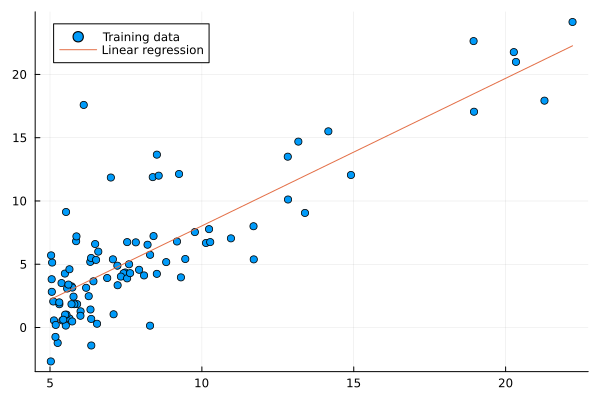

In [13]:
scatter(data[:,1], y, label="Training data")
plot!(data[:,1], X*theta, label="Linear regression")

# Visualizando $J(\theta)$ e o método do gradiente

Plote o espaço da solução da função custo para ter uma ideia do método do gradiente.

### Criando um grid para $\theta$  e calculando os custos 

In [14]:
theta0 = range(-10, stop=10, length=50)
theta1 = range(-1, stop=4, length=50)
thetas = Iterators.product(theta0, theta1)

cost_space = map(t -> compute_cost(X, y, collect(t)), thetas);

## Gráfico de superfície da função custo

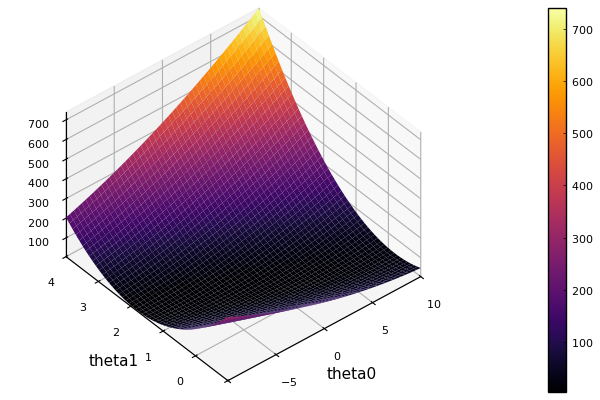

In [15]:
pyplot()
plot(theta0, theta1, cost_space', st=:surface, camera=(-40, 40),
     xlabel="theta0", ylabel="theta1")

## Curvas de nível



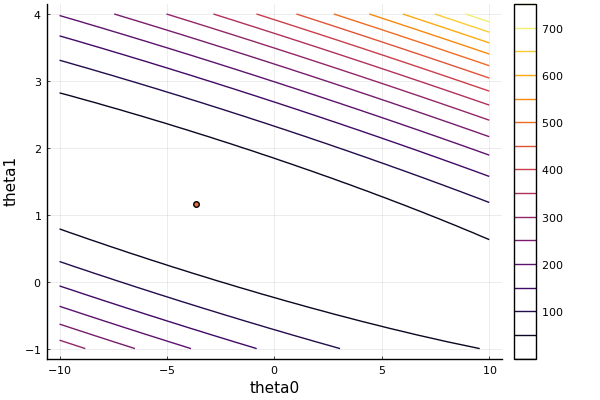

sys:1: UserWarning: The following kwargs were not used by contour: 'label'
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: The following kwargs were not used by contour: 'label'
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: The following kwargs were not used by contour: 'label'
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: The following kwargs were not used by contour: 'label'
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


In [16]:
plot(theta0, theta1, cost_space', st=:contour,
     xlabel="theta0", ylabel="theta1")
scatter!((theta[1], theta[2]), legend=false)

# Regressão com múltiplas variáveis

A adaptação do código anterior para múltiplas variáveis é natural e implícita (thanks Julia).

## 10 - Normalização dos dados de `ex1data2.txt`

Faça a leitura dos novos dados e realize a seguinte normalização:

    Subtraia cada amostra pelo valor médio de cada feature.
    Após realizada a subtração, divida pelo desvio padrão (para cada feature).

In [17]:
data = readdlm("ex1data2.txt", ',');
x = data[:, 1:2];
y = data[:, 3];

In [18]:

using Statistics

"""
    feature_normalize(x)

Normalize features 
# Argument
- `x::Array{Number, 2}` : the independent variable matrix. The rows are examples, the columns features.

# Returns
- `::Array{Number, 2}`: Normalized independent variables
- `::Array{Number, 2}`: means of the examples
- `::Array{Number, 2}`: standard deviations of the examples
"""
function feature_normalize(X::Matrix{Float64})
    mu = mean(X, dims=1)
    sigma = std(X, dims=1)
    X_norm = (X .- mu) ./ sigma
    return X_norm, mu, sigma
end

feature_normalize

In [19]:
x_norm, mu_x, std_x = feature_normalize(x);

## Resolvendo utilizando método do gradiente

In [20]:
alpha = 0.01
num_iters = 400
theta_init = zeros(3);

In [21]:
m = length(y);
X = [ones(m, 1) x_norm];
theta_init = zeros(3);
theta = gradient_descent(X, y, theta_init, alpha, num_iters)

3-element Vector{Float64}:
 334302.06399327697
 100087.11600584643
   3673.5484509282533

## Estimando o valor com  $\theta$ obtido

In [22]:
x1 = [1650.; 3.]
theta'*[1,(1650-mu_x[1])/std_x[1],(3-mu_x[2])/std_x[2]]

289314.6203377763

## Resolvendo a regressão linear pela equação normal

In [23]:
function normalEqn(X, y)
    # Calcula a solução de forma fechada para a regressão linear
    # usando as equações normais.
    theta = pinv(X'X) * X' * y
    return theta
end

data = readdlm("ex1data2.txt", ',') 

# Extrair x e y
X = data[:, 1:2]
y = data[:, 3]
m = size(y, 1) # Tamanho do vetor y

X = hcat(ones(m), X)

theta = normalEqn(X, y)

println("Theta calculado pela equação normal:")
println(theta)

price = [1.0, 1650.0, 3.0]' * theta

println("\n Preço estimado de uma casa com 1650 sq-ft, 3 quartos (usando equação normal): $price")

Theta calculado pela equação normal:
[89597.90954354871, 139.2106740176264, -8738.019112553447]

 Preço estimado de uma casa com 1650 sq-ft, 3 quartos (usando equação normal): 293081.4643349719
